## Lab | Feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('C:/Users/Admin/Documents/ironhack/Week_7/Day_1/learningSet.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17008\2213626359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/Admin/Documents/ironhack/Week_7/Day_1/learningSet.csv')


#### Check for null values in the numerical columns.

In [13]:
data1 = data.copy()

In [25]:
numerical = data1.select_dtypes(np.number)
numerical_df = pd.DataFrame(numerical.isna().sum()/len(data)).reset_index()
numerical_df.columns = ['column_name', 'nulls_percentage']
numerical_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


#### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [59]:
#data1['GEOCODE2'].value_counts(dropna = False)
# we have 187 values that are unknown, 132 NaN
#categorise unknow values to 'other'

In [52]:
data1['GEOCODE2'] = data1['GEOCODE2'].apply(lambda x: x if x in ['A','B','C','D'] else 'other')
data1['GEOCODE2'].value_counts(dropna = False)

A        34484
B        28505
D        16580
C        15524
other      319
Name: GEOCODE2, dtype: int64

#### Categorising the WEALTH into 3 different parts

In [83]:
# can we categorise the wealth ..?
binned_data = data1['WEALTH1'].value_counts(bins=3)
#lets put them into 3 categories
binned_data

(6.0, 9.0]                      20576
(3.0, 6.0]                      15915
(-0.009999999999999998, 3.0]    14189
Name: WEALTH1, dtype: int64

In [ ]:
Rearranging the ADI and MSA into decreasing order

In [100]:
data1[['ADI']].value_counts(ascending=True)

ADI  
651.0       1
147.0       1
161.0       1
103.0       1
601.0       1
         ... 
105.0    2617
57.0     2836
65.0     3765
51.0     4622
13.0     7296
Length: 204, dtype: int64

In [101]:
data1['DMA'].value_counts(ascending=True)

516.0       1
584.0       1
569.0       1
554.0       1
552.0       1
         ... 
819.0    2588
505.0    2839
807.0    3765
602.0    4632
803.0    7296
Name: DMA, Length: 206, dtype: int64

In [102]:
data1[['MSA']].value_counts().head(10)

MSA   
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
6780.0     1525
5945.0     1500
7320.0     1472
7600.0     1457
3360.0     1414
dtype: int64

In [68]:
data1['MSA'].value_counts().tail(10)


1320.0    1
8003.0    1
1540.0    1
2975.0    1
9000.0    1
9140.0    1
3200.0    1
9280.0    1
743.0     1
8480.0    1
Name: MSA, dtype: int64

#### Use appropriate EDA technique where ever necessary.

In [ ]:
# lets try to observe different distributions

<AxesSubplot:>

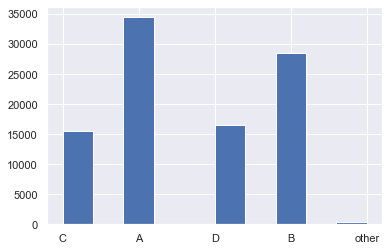

In [70]:
sns.set()
data1['GEOCODE2'].hist()

<AxesSubplot:>

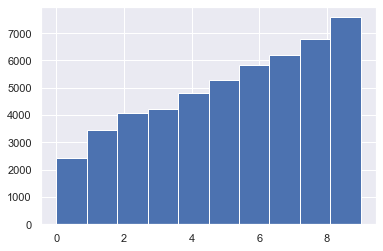

In [92]:
sns.set()
#fig, axes = plt.subplots(1, 2)
#sns.distplot(data=data1['WEALTH1'], x='X', y='counts', ax=axes[0])
#sns.distplot(data=binned_data, x='X', y='counts', ax=axes[1])

# without binning
data1['WEALTH1'].hist()

<AxesSubplot:>

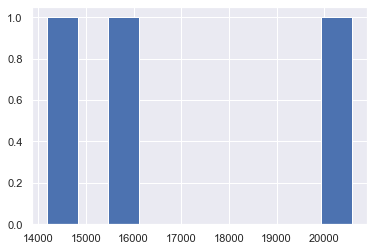

In [91]:
# with binning
# binned_data = data1['WEALTH1'].value_counts(bins=3)
binned_data.hist()


<AxesSubplot:>

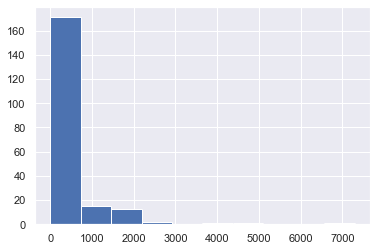

In [103]:
sns.set()
data1[['ADI']].value_counts(ascending=True).hist()

<AxesSubplot:>

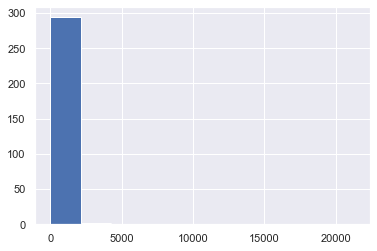

In [104]:
sns.set()
data1[['MSA']].value_counts(ascending=True).hist()

<AxesSubplot:>

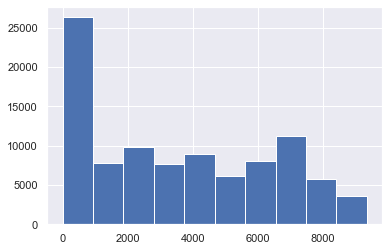

In [95]:
sns.set()
data1['MSA'].hist()